In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
df_raw = pd.read_csv('listings_main.csv')
df_raw.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,22229408,https://www.airbnb.com/rooms/22229408,20230319041206,2023-03-19,previous scrape,"Explorer's Paradise: Near Train, Bus & Bike Share",Welcome to your perfect urban escape in the Na...,My home is located in the Edgewood neighborhoo...,https://a0.muscache.com/pictures/8e49b7bc-a851...,120875011,...,4.85,4.75,4.75,NaN,f,1,0,1,0,0.32
1,46951758,https://www.airbnb.com/rooms/46951758,20230319041206,2023-03-19,city scrape,Boutique Style Home - Rooftop w/Breathtaking V...,Explore or get settled in this artsy modern ro...,"Food & Drinks: Starbucks, Mama's Pizza, Busboy...",https://a0.muscache.com/pictures/miso/Hosting-...,55133178,...,4.82,4.51,4.80,Hosted License: 5007242201002380\nUnhosted Lic...,f,1,1,0,0,1.87
2,580379638076900630,https://www.airbnb.com/rooms/580379638076900630,20230319041206,2023-03-19,city scrape,Sojourn | Penthouse | Private Outdoor Space | ...,Boutique building in one of DC's best neighbor...,Dupont Circle stands out as a cosmopolitan jew...,https://a0.muscache.com/pictures/prohost-api/H...,39930655,...,NaN,NaN,NaN,NaN,f,173,154,13,5,NaN
3,594971943284098653,https://www.airbnb.com/rooms/594971943284098653,20230319041206,2023-03-19,city scrape,Quaint 1-bedroom apartment with outdoor Patio,Welcome to the center of DC. Half-way between ...,NaN,https://a0.muscache.com/pictures/5746a258-d2f7...,351398058,...,5.00,4.73,4.73,Hosted License: 5007242201002106\nUnhosted Lic...,t,3,2,1,0,1.20
4,54371126,https://www.airbnb.com/rooms/54371126,20230319041206,2023-03-19,city scrape,Waterfront Two Bedroom Apartment In a Brand Ne...,Located in Washington in the District of Colum...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,395672427,...,5.00,5.00,5.00,Unhosted License: 5007242100000024,t,7,7,0,0,0.48


In [3]:
df_raw.shape

(6455, 75)

In [4]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6455.0,1.923604e+17,3.213013e+17,3.686000e+03,2.154794e+07,4.308849e+07,5.712795e+17,8.495214e+17
scrape_id,6455.0,2.023032e+13,1.863426e+00,2.023032e+13,2.023032e+13,2.023032e+13,2.023032e+13,2.023032e+13
host_id,6455.0,1.196612e+08,1.384525e+08,4.492000e+03,1.619917e+07,5.322283e+07,1.747920e+08,5.058822e+08
host_listings_count,6455.0,2.567620e+02,9.188548e+02,1.000000e+00,1.000000e+00,3.000000e+00,2.500000e+01,4.807000e+03
host_total_listings_count,6455.0,3.673005e+02,1.248540e+03,1.000000e+00,2.000000e+00,4.000000e+00,4.100000e+01,8.342000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,6455.0,3.891006e+01,2.423870e-02,3.881995e+01,3.889786e+01,3.890937e+01,3.892238e+01,3.899272e+01
longitude,6455.0,-7.701452e+01,3.065127e-02,-7.711269e+01,-7.703360e+01,-7.701599e+01,-7.699546e+01,-7.691092e+01
accommodates,6455.0,3.681797e+00,2.365777e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part - 1: Dealing with Missing Data

### Drop the Unwanted Columns for Analysis

In [5]:
# Remove the below columns since they do not hold any data in them.
df = df_raw.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated'], axis = 1)

# Remove the below columns since we won't be using them for the initial analysis.
df = df.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'neighborhood_overview','host_url','host_about',
        'host_thumbnail_url', 'host_listings_count', 'host_verifications', 'host_has_profile_pic',  'maximum_nights', 
        'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
        'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped', 'first_review', 'last_review'], axis = 1)

len(df.columns)

51

### Create a re-usable function to easily obtain the information required for analysis

In [6]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [7]:
sniff_modified(df)

,data type,percent missing,No. unique,unique values
id,int64,0.000000,6455,"[22229408, 46951758, 580379638076900630, 59497..."
calculated_host_listings_count_private_rooms,int64,0.000000,20,"[1, 0, 13, 10, 28, 3, 2, 163, 4, 38, 5, 8, 6, ..."
calculated_host_listings_count_entire_homes,int64,0.000000,29,"[0, 1, 154, 2, 7, 13, 4, 16, 11, 35, 138, 10, ..."
calculated_host_listings_count,int64,0.000000,34,"[1, 173, 3, 7, 13, 2, 10, 4, 45, 11, 35, 138, ..."
host_id,int64,0.000000,3364,"[120875011, 55133178, 39930655, 351398058, 395..."
calculated_host_listings_count_shared_rooms,int64,0.000000,10,"[0, 5, 1, 4, 13, 16, 2, 9, 20, 8]"
minimum_nights,int64,0.000000,60,"[31, 2, 181, 1, 3, 6, 28, 5, 7, 30, 91, 32, 4,..."
availability_30,int64,0.000000,31,"[0, 10, 18, 1, 5, 30, 2, 11, 23, 3, 28, 29, 14..."
availability_60,int64,0.000000,61,"[0, 27, 48, 1, 15, 14, 60, 32, 17, 44, 18, 58,..."
availability_90,int64,0.000000,91,"[0, 53, 78, 1, 35, 10, 27, 90, 62, 25, 70, 45,..."


### Normalize the Representation of Missing Values

It will be much easier to handle if we convert all the different ways this data has to signal missing data down to a single representation: np.nan. To do this we will use the following function which:

1. Converts all strings (text) to lower case;
2. Fill actual missing data with np.nan; the impact of this is to convert None to np.nan;
3. Convert all the other representations ('none', 'none or unspecified', '#name?', and '') to np.nan.

In [8]:
from pandas.api.types import is_string_dtype, is_object_dtype

def df_normalize_strings(df):
    for col in df.columns:
        if is_string_dtype(df[col]) or is_object_dtype(df[col]):
            df[col] = df[col].str.lower() # lower case
            df[col] = df[col].fillna(np.nan) # replacing na with np.nan

df_normalize_strings(df)

## Creating the function to extract Numeric Values from Columns

In [9]:
def extract_numeric_value(df, colname):
    df[colname] = df[colname].str.extract('(\d+\.\d+|\d+)', expand=True)
    df[colname] = df[colname].replace('', np.nan)
    df[colname] = pd.to_numeric(df[colname]) # for datatype is string we will change it to numeric.

# Extracting Numeric values from the below Columns

extract_numeric_value(df,'price')
extract_numeric_value(df,'bathrooms_text')
extract_numeric_value(df,'host_response_rate')
extract_numeric_value(df,'host_acceptance_rate')

In [10]:
# Renaming Bathroom_text column to Bathroom
df['bathroom'] = df['bathrooms_text']
df = df.drop(['bathrooms_text'], axis = 1)

In [11]:
# Replace NaN values with 0
df.fillna(0, inplace=True)

In [12]:
# Remove listings with 0 for  bedrooms, bathroom, accomodates, price, beds, review_scores_rating, reviews_per_month
df = df[df.bedrooms > 0]
df = df[df.bathroom > 0]
df = df[df.accommodates > 0]
df = df[df.price > 0]
df = df[df.beds > 0]
df = df[df.review_scores_rating > 0]
df = df[df.reviews_per_month > 0]

df.head()

,id,name,description,picture_url,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom
0,22229408,"explorer's paradise: near train, bus & bike share",welcome to your perfect urban escape in the na...,https://a0.muscache.com/pictures/8e49b7bc-a851...,120875011,j. p.,2017-03-15,"washington, dc",0,0.0,...,4.75,4.75,0,f,1,0,1,0,0.32,1.0
1,46951758,boutique style home - rooftop w/breathtaking v...,explore or get settled in this artsy modern ro...,https://a0.muscache.com/pictures/miso/hosting-...,55133178,quinton,2016-01-18,"washington, dc",within an hour,100.0,...,4.51,4.80,hosted license: 5007242201002380\nunhosted lic...,f,1,1,0,0,1.87,2.5
3,594971943284098653,quaint 1-bedroom apartment with outdoor patio,welcome to the center of dc. half-way between ...,https://a0.muscache.com/pictures/5746a258-d2f7...,351398058,ladi,2020-06-22,"washington, dc",within an hour,100.0,...,4.73,4.73,hosted license: 5007242201002106\nunhosted lic...,t,3,2,1,0,1.20,1.0
4,54371126,waterfront two bedroom apartment in a brand ne...,located in washington in the district of colum...,https://a0.muscache.com/pictures/prohost-api/h...,395672427,redawning,2021-04-05,"emeryville, ca",0,0.0,...,5.00,5.00,unhosted license: 5007242100000024,t,7,7,0,0,0.48,2.0
5,46428174,central dc shaw condo | longterm furnished,historic shaw rowhouse in the heart of washing...,https://a0.muscache.com/pictures/b24a2e32-3bf9...,9680354,adam,2013-10-28,"washington, dc",within an hour,100.0,...,4.92,4.79,hosted license: 5007242201001021,t,13,13,0,0,1.52,1.0


# 1. Analyzing the listings based on room types

Number of room types : 4

entire home/apt    3485
private room        915
shared room          54
hotel room           15
Name: room_type, dtype: int64


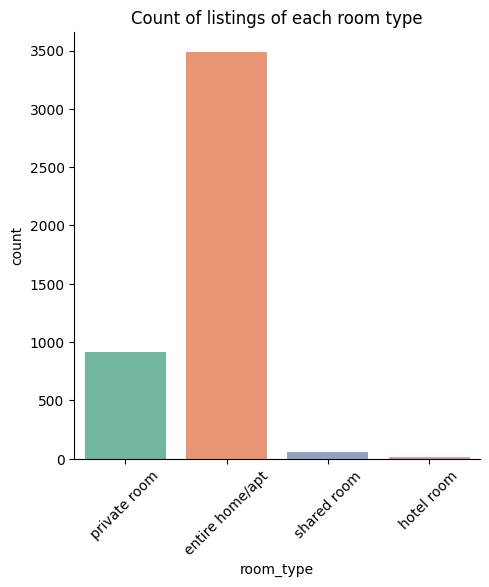

In [13]:
# Number of room types
print("Number of room types :", len(df["room_type"].unique()))
print()

# Number of listings of each room type
print(df["room_type"].value_counts())
g = sns.catplot(x = "room_type", data = df, kind = "count", palette="Set2")
plt.title('Count of listings of each room type')
# Rotate y-axis label
g.set_xticklabels(rotation=45)

#### As it can be seen from the countplot, most of the listings are entire home/apt with private rooms being second and shared rooms being the least.

# 2. Analyzing the listings based on the property type.

Number of property types : 41

entire rental unit             1561
entire home                     533
entire townhouse                442
private room in home            375
entire guest suite              360
entire condo                    302
private room in townhouse       247
entire serviced apartment       177
private room in rental unit     143
entire guesthouse                55
Name: property_type, dtype: int64


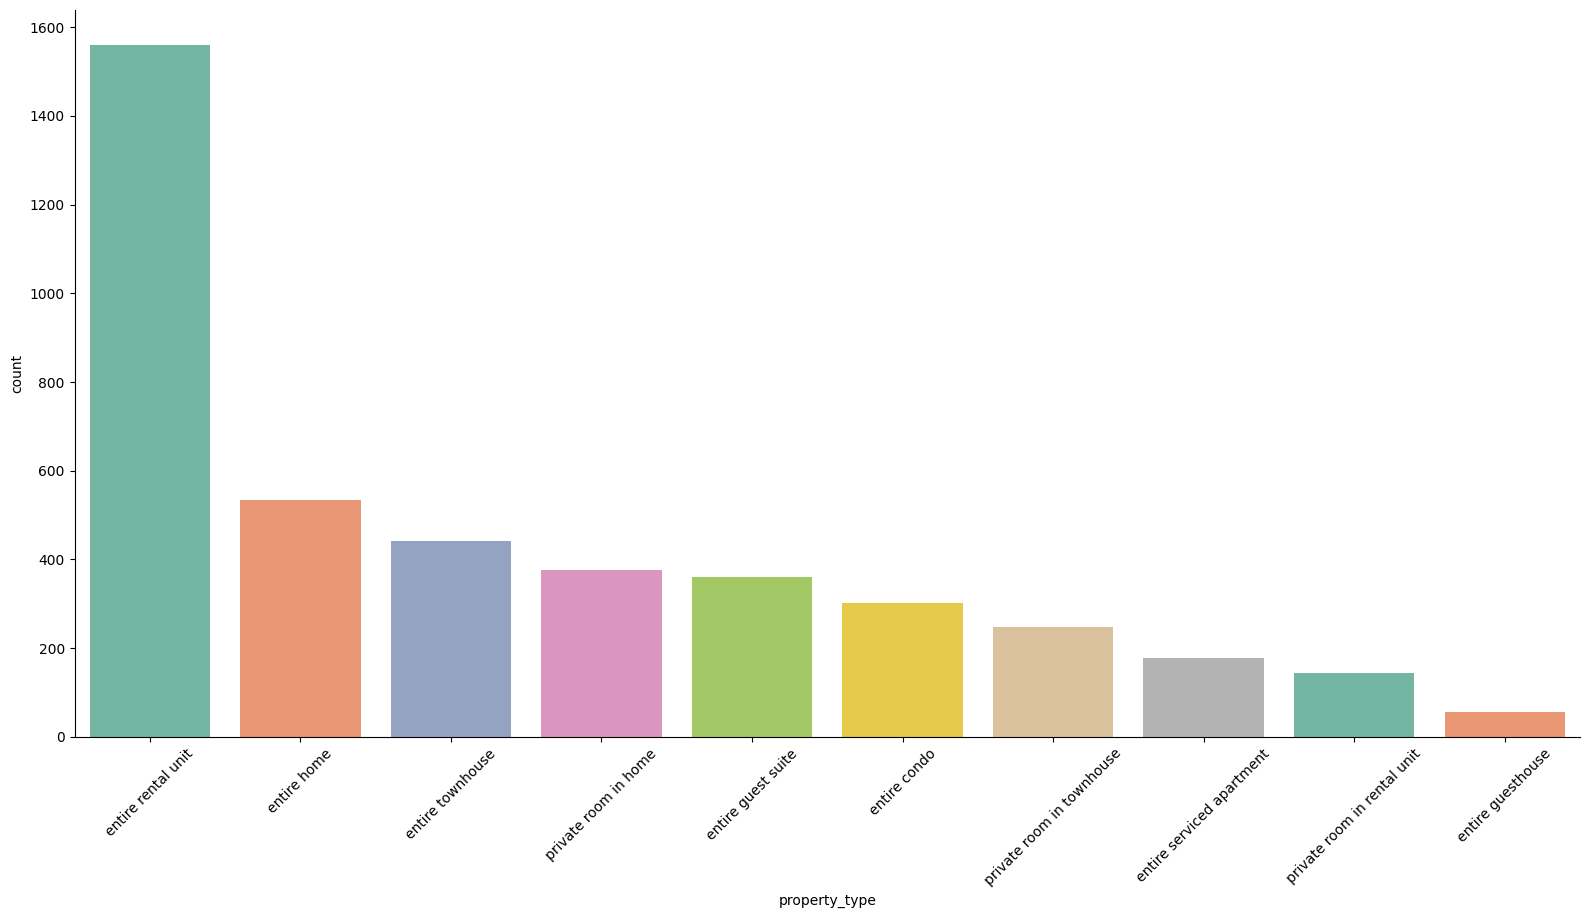

In [14]:
# Number of property types
print("Number of property types :", len(df["property_type"].unique()))
print()

# Number of listings of each room type
print(df["property_type"].value_counts().head(10))
g = sns.catplot(x = "property_type", data = df, kind = "count", palette="Set2", height = 8, aspect = 2,
            order=df["property_type"].value_counts().head(10).index)
# Rotate y-axis label
g.set_xticklabels(rotation=45)

# 3. Analyzing the prices for the different room and property types.

In [15]:
# Checking out the mean prices for the different room and property types

Room_Property_DF = df.groupby(['property_type','room_type']).price.mean()
Room_Property_DF = Room_Property_DF.reset_index()
Room_Property_DF = Room_Property_DF.sort_values('price',ascending=[0])
Room_Property_DF = Room_Property_DF.head(50)

<AxesSubplot: xlabel='room_type', ylabel='property_type'>

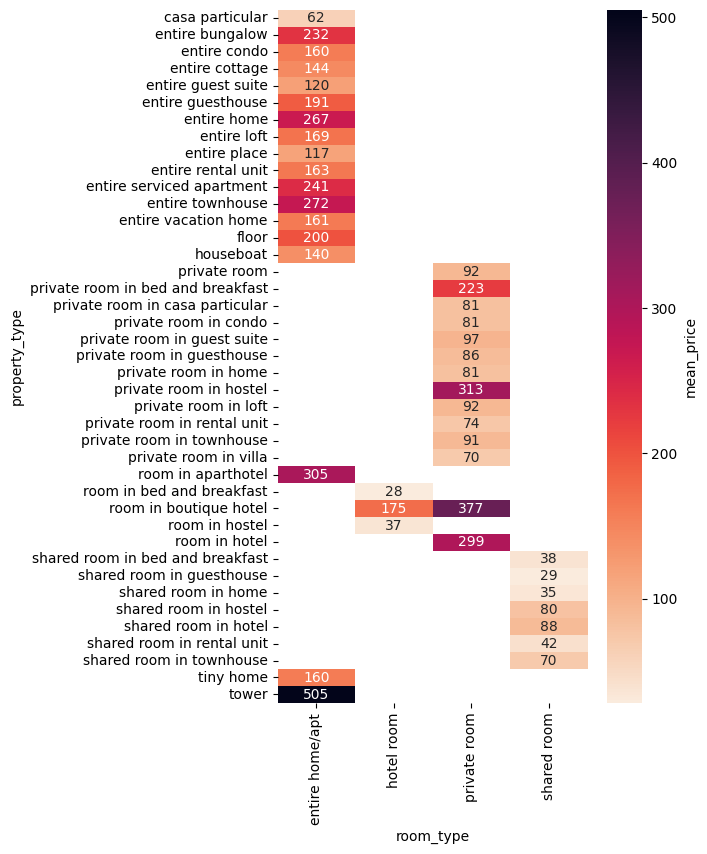

In [16]:
# Plotting a heatmap of the mean price for Top 20 room type and a property type

plt.figure(figsize = (5,9))
sns.heatmap(Room_Property_DF.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f",
           cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})


#### From the above heatmap, with lighter colour representing lower price and darker representing higher price, we can see that shared rooms have the lighest colour hence cheapest. Private rooms have a slightly darker colour so they are in the middle, and entire houses are the darkest thus the most expensive. 

- It is also important to note that the highest number of listings which was house and apartments actually have very similar prices for each of the room_type category.

- All of this tells us that the room_type and property_type both play a very important role in the final price of the listing.

# 4. Anaylzing the listings based on the number of bedrooms.

Text(0.5, 1.0, 'Price of listings based on the number of bedrooms')

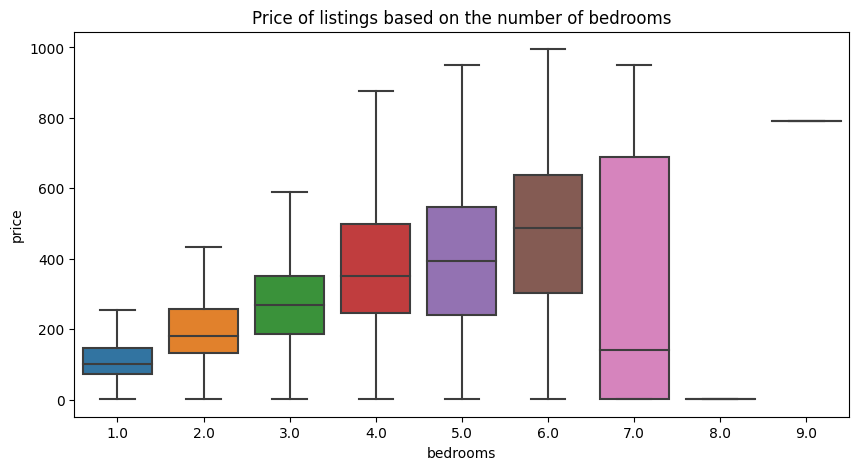

In [17]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms', y='price', data=df[['bedrooms', 'price']], showfliers = False)
plt.title('Price of listings based on the number of bedrooms')

##### The boxplots above show that indeed there is a trend between bedrooms and price.

# 5. Analyzing neighbourhood with price of listing

In [18]:
# Checking out the mean prices for the Bedrooms and each room_types

Neighbourhood_Property_Type_DF = df.groupby(['neighbourhood_cleansed', 'property_type']).price.mean()
Neighbourhood_Property_Type_DF = Neighbourhood_Property_Type_DF.reset_index()
Neighbourhood_Property_Type_DF = Neighbourhood_Property_Type_DF.sort_values('price',ascending=[0])
Neighbourhood_Property_Type_DF = Neighbourhood_Property_Type_DF.head(20)

Text(0.5, 1.0, 'Heatmap of the neighbourhoods vs property type with the median price')

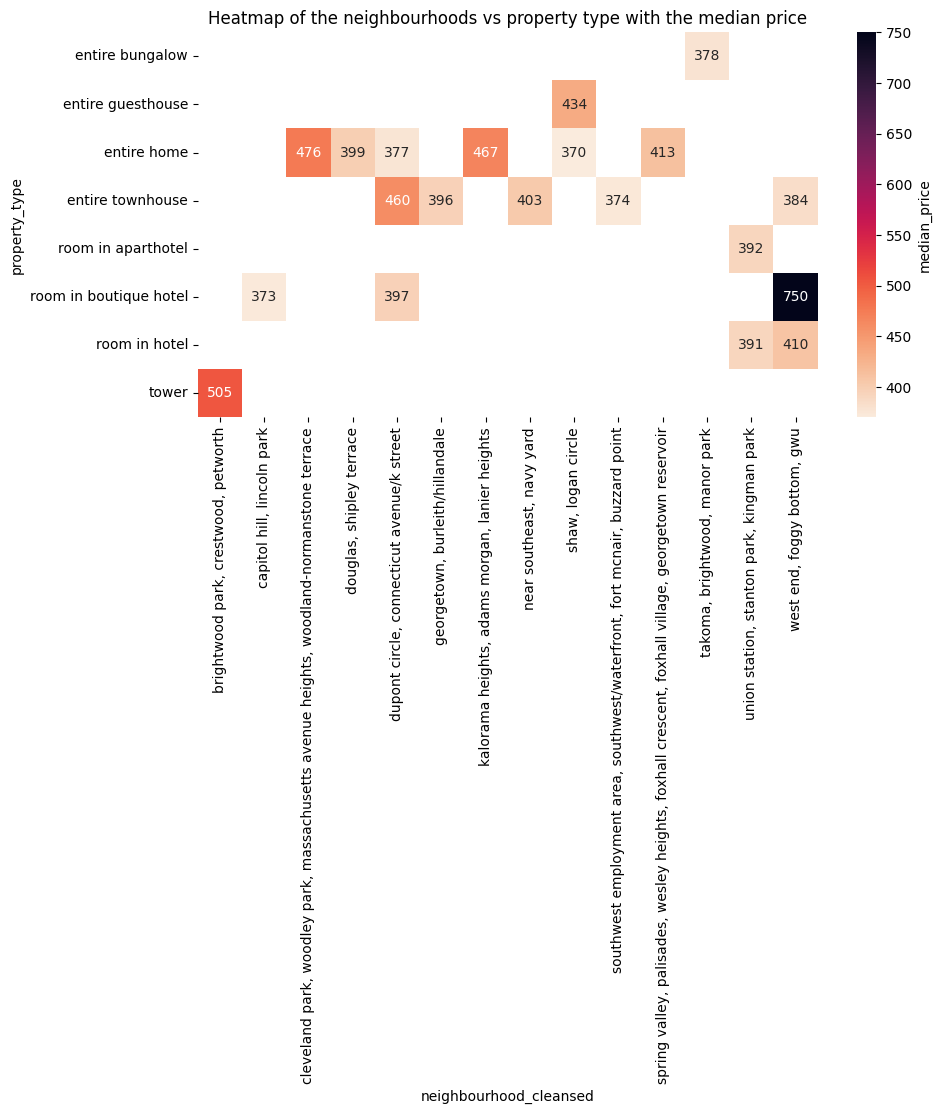

In [19]:
# Plotting a heatmap of the neighbourhoods vs property type with the median price

plt.figure(figsize=(10,5))
sns.heatmap(Neighbourhood_Property_Type_DF.groupby(['property_type', 'neighbourhood_cleansed']).price.median().unstack(),
            annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'median_price'})
plt.title('Heatmap of the neighbourhoods vs property type with the median price')

# 6. Analyzing  Amenity resulting in Higher Prices.

##### We are going to analyze the textual data of ammenities by finding the words that appear most frequently in ammenities in the most expensive listings.

In [20]:
import nltk
from nltk.corpus import stopwords
import re

# Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenitiesDF = df[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

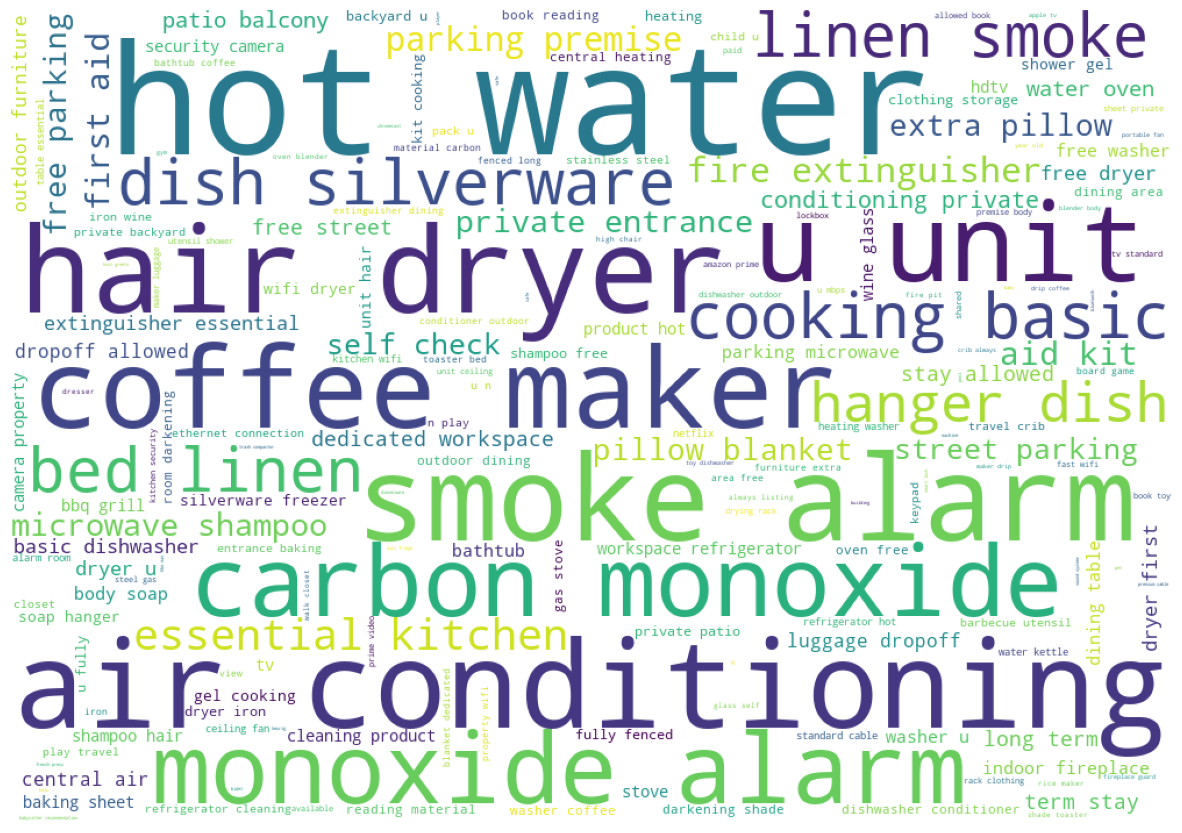

In [21]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#####  From the above wordcloud, we can see that the listings with the highest prices have ammenities such as:
1. 'Hot Water'
2. 'Coffee Maker'
3. 'Air Conditioning'
4. 'Smoke Detector'
5. 'Essential Kitchen'.

## 7. Analyzing the Top 10 Number of Listings and Median Price with Neighbourhood

In [22]:
# Grouping neighbourhood by number of listings and then cleaning them

neighbourhood_DF = df.groupby('neighbourhood_cleansed').id.count()
neighbourhood_DF = neighbourhood_DF.reset_index()
neighbourhood_DF = neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF = neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF = neighbourhood_DF.head(10)

# Grouping neighbourhood by average price of listings and cleaning them

neighbourhoodPrice_DF=df.groupby('neighbourhood_cleansed').price.median()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Median_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Median_Price',ascending=[0])
neighbourhoodPrice_DF = neighbourhoodPrice_DF.head(10)

# Merging the two dataframes
mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')

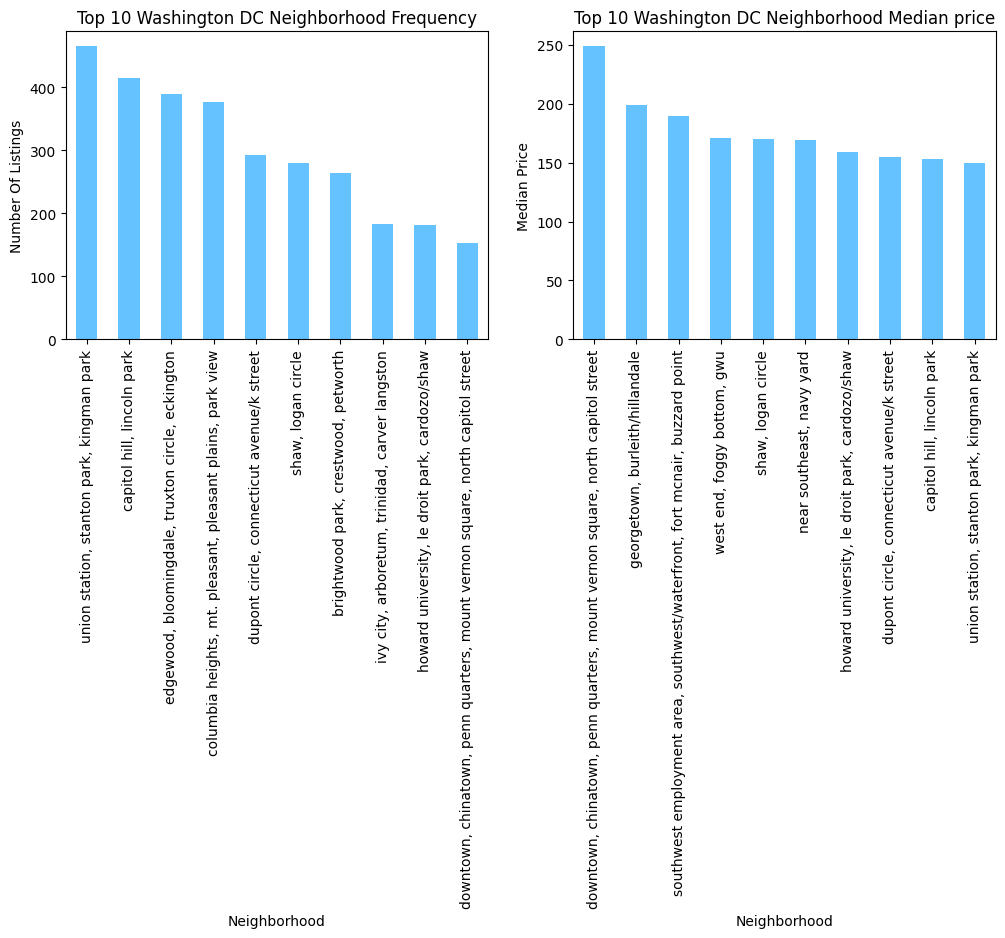

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

neighbourhood_DF.plot(kind='bar', x='neighbourhood_cleansed', y='Number_Of_Listings', color='#66c2ff', ax=axs[0], 
                      title='Top 10 Washington DC Neighborhood Frequency', legend=False)
axs[0].set_ylabel('Number Of Listings')
axs[0].set_xlabel('Neighborhood')

neighbourhoodPrice_DF.plot(kind='bar', x='neighbourhood_cleansed', y='Median_Price', color='#66c2ff', ax=axs[1], 
                           title='Top 10 Washington DC Neighborhood Median price', legend=False)
axs[1].set_ylabel('Median Price')
axs[1].set_xlabel('Neighborhood')

plt.show()

# 8. Exploring Top 10 Hosts (IDs) having the most listings on Airbnb

In [24]:
top_host=df.host_id.value_counts().head(10)

top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)

[Text(0, 0, '17633'),
 Text(1, 0, '315148'),
 Text(2, 0, '487806'),
 Text(3, 0, '30283594'),
 Text(4, 0, '39930655'),
 Text(5, 0, '46630199'),
 Text(6, 0, '48005494'),
 Text(7, 0, '69203193'),
 Text(8, 0, '107434423'),
 Text(9, 0, '146624030')]

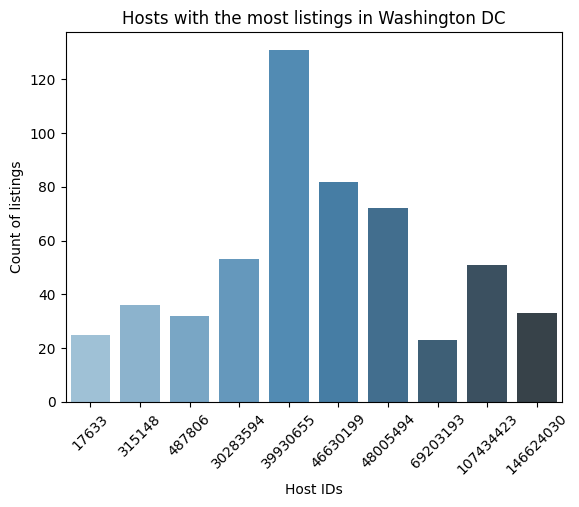

In [25]:
top_host_plot=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')
top_host_plot.set_title('Hosts with the most listings in Washington DC')
top_host_plot.set_ylabel('Count of listings')
top_host_plot.set_xlabel('Host IDs')
top_host_plot.set_xticklabels(top_host_plot.get_xticklabels(), rotation=45)

##### It could be observed that there is a good distribution between top 10 hosts with the most listings.

## 9. Analyzing the Average AirBNB Prices in Washington, D.C. By Year and Month

In [26]:
# Convert the date column to a datetime format
df['host_since'] = pd.to_datetime(df['host_since'])

# Sort the DataFrame by the date column in ascending order
df = df.sort_values('host_since', ascending=True)

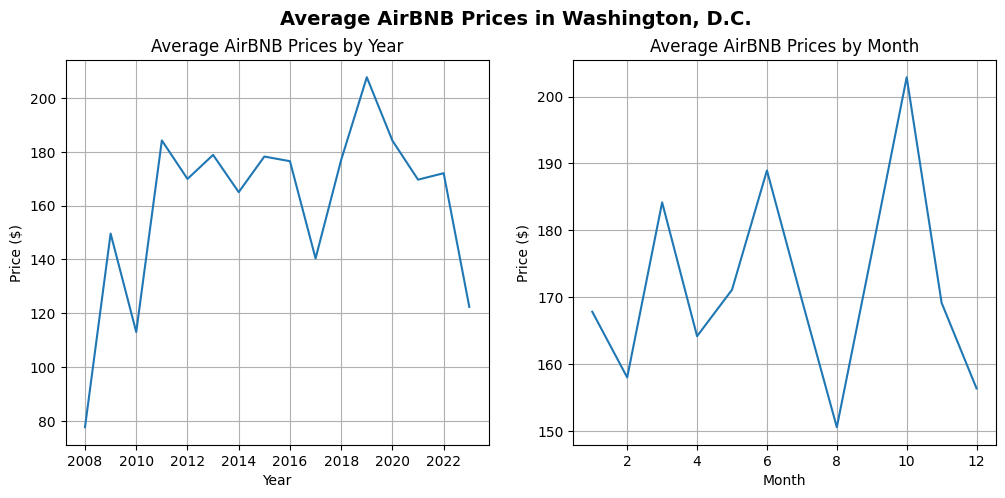

In [27]:
# Group the data by year and calculate the average price for each year
yearly_prices = df.groupby(df['host_since'].dt.year)['price'].mean()

# Create a line chart of the yearly prices
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axs[0].plot(yearly_prices.index, yearly_prices.values)
axs[0].set_title('Average AirBNB Prices by Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Price ($)')

# Group the data by month and calculate the average price for each month
monthly_prices = df.groupby(df['host_since'].dt.month)['price'].mean()

# Create a line chart of the monthly prices
axs[1].plot(monthly_prices.index, monthly_prices.values)
axs[1].set_title('Average AirBNB Prices by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Price ($)')

# Add a common title for both charts
fig.suptitle('Average AirBNB Prices in Washington, D.C.', fontsize=14, fontweight='bold')

# Add gridlines to both charts
axs[0].grid(True)
axs[1].grid(True)

# Display the charts
plt.show()